In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('customer_segmentation.csv')

data.head(10)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C
7,464347,Female,No,33,Yes,Healthcare,1.0,Low,3.0,Cat_6,D
8,465015,Female,Yes,61,Yes,Engineer,0.0,Low,3.0,Cat_7,D
9,465176,Female,Yes,55,Yes,Artist,1.0,Average,4.0,Cat_6,C


In [3]:
data.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [4]:
data = data.drop(columns=['ID', 'Gender', 'Ever_Married', 'Graduated', 'Profession',
     'Spending_Score', 'Var_1',
       'Segmentation'])

In [5]:
data.head()

,Age,Work_Experience,Family_Size
0,22,1.0,4.0
1,38,NaN,3.0
2,67,1.0,1.0
3,67,0.0,2.0
4,40,NaN,6.0


In [6]:
data.isnull().sum()

Age                   0
Work_Experience    1098
Family_Size         448
dtype: int64

In [9]:
data = data.dropna()

## step-3 Scale the data(if needed)

In [10]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled

array([[-1.29420836, -0.47629886,  0.75349091],
       [ 1.41867106, -0.47629886, -1.19897576],
       [ 1.41867106, -0.77173851, -0.54815354],
       ...,
       [-0.51048764, -0.47629886, -1.19897576],
       [ 0.21294687, -0.47629886,  1.40431313],
       [-0.02819797,  1.88721829,  0.10266869]])

## Step 4- Apply K-Means for Various K Values

In [14]:
inertia_values = []
silhouette_scores = []
k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)

    inertia_values.append(kmeans.inertia_)

    silhouette = silhouette_score(data_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette)

In [19]:
#inertia_values
silhouette_scores

[0.2694972009523588,
 0.3543380730251246,
 0.35186036094189155,
 0.3564238777132847,
 0.36285216732331926,
 0.35808478192614307,
 0.3515340641430051,
 0.34044504989108004]

## Step 5: Elbow Method

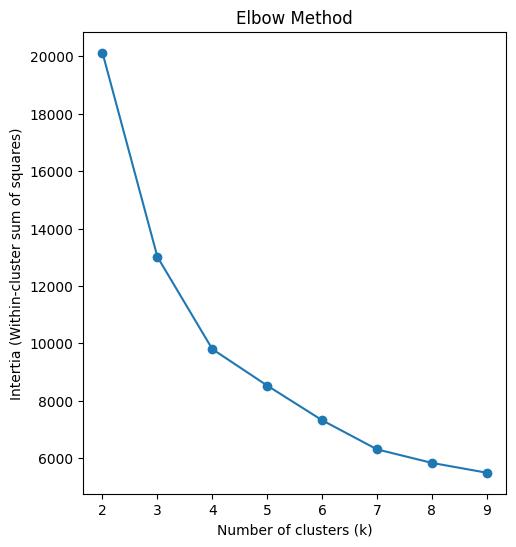

In [18]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(k_range, inertia_values, marker='o', linestyle='-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Intertia (Within-cluster sum of squares)')
plt.title('Elbow Method')
plt.show()

## Step 6: Silhouette Score

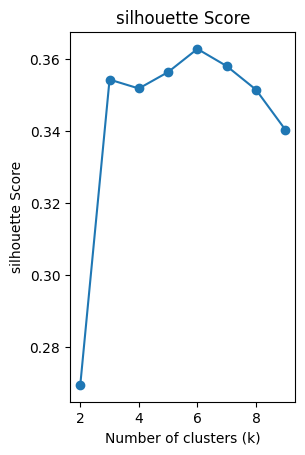

In [20]:
plt.subplot(1,2,2)
plt.plot(k_range, silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('silhouette Score')
plt.title('silhouette Score')
plt.show()


### Step 8- Interpretation

In [21]:
# Find the K value from the Elbow Method
elbow_K = 7  # Replace with the K value where you observe the "elbow" in the plot

# Find the K value from the Silhouette Score
silhouette_K = 6  # Replace with the K value that maximizes the Silhouette Score

# Print the selected K values
print(f"Selected K value from Elbow Method: {elbow_K}")
print(f"Selected K value from Silhouette Score: {silhouette_K}")


Selected K value from Elbow Method: 7
Selected K value from Silhouette Score: 6


In [23]:
#You can use either the K value from the Elbow Method or the Silhouette Score, based on your preference and
#the characteristics of the dataset